# Sentiment Analysis using Deep Learning in Keras

### Importing Required Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from numpy import array, asarray, zeros
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten, GlobalMaxPooling1D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.layers import Conv1D
from keras.layers import LSTM

### Importing Dataset

Dataset 1 link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset 2 link: https://github.com/vineetdhanawat/twitter-sentiment-analysis/blob/master/datasets/Sentiment%20Analysis%20Dataset%20100000.csv

In [2]:
df = []
df.append(pd.read_csv('data/IMDB Dataset.csv', nrows = 10000))
df.append(pd.read_csv('data/Sentiment Analysis Dataset 100000.csv', encoding = 'latin-1', nrows = 10000))
df[1].drop(['ItemID'], axis = 'columns', inplace = True)

In [3]:
df[0].head(5)

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df[1].head(5)

,sentiment,text
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [5]:
df[0]['text'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
df[1]['text'][0]

'                     is so sad for my APL friend.............'

In [7]:
for i in df:
    print(i.isnull().values.any())

False
False


<AxesSubplot:xlabel='sentiment', ylabel='count'>

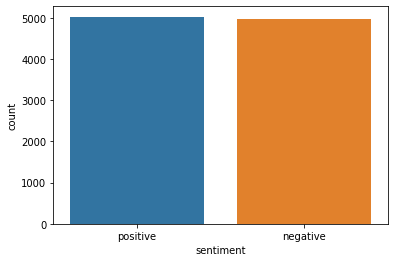

In [8]:
sns.countplot(x = 'sentiment', data = df[0])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

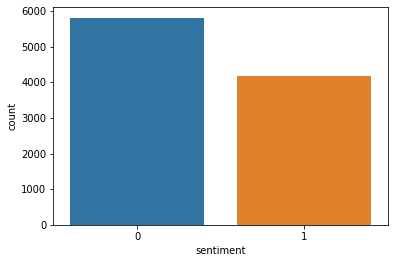

In [9]:
sns.countplot(x = 'sentiment', data = df[1])

## Data Processing

#### Dataset 1 Cleaning

In [10]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_html_tags(sen):
    return TAG_RE.sub('', sen)

In [11]:
def data_processing_1(sen):
    sen = remove_html_tags(sen) # remove html tag
    sen = sen.replace('n\'t', ' not') # convert n't to not
    sen = re.sub(r"\s+[a-zA-Z]\s+", ' ', sen) # remove single letter
    sen = re.sub(r'\s+', ' ', sen) # remove multiple spaces
    sen = re.sub(r'[.]+', '.', sen) # remove multiple dots
    sen = sen.replace('\\\'', ' ') # remove \
    return sen

In [12]:
X = [["0"]*10000]*3

In [13]:
sentences = list(df[0]['text'])
i = 0

for sen in sentences:
    X[0][i] = data_processing_1(sen)
    i = i + 1

X[0] = np.array(list(X[0]))

In [14]:
y = [[0]*10000]*3
y[0] = df[0]['sentiment']
y[0] = np.array(list(map(lambda x: 1 if x == "positive" else 0, y[0])))

In [15]:
for i in range(0, 5):
    print(y[0][i], end = ', ')

1, 1, 1, 0, 1, 

In [16]:
print(np.shape(X[0]))
print(np.shape(y[0]))

(10000,)
(10000,)


#### Dataset 2 Cleaning

In [17]:
def data_processing_2(sen):
    sen = sen.replace('&quot;3', '')
    sen = sen.replace('&quot;', '')
    sen = sen.replace('&lt;3', '')
    sen = sen.replace('&lt;', '')
    sen = sen.replace('&gt;', '')
    sen = re.sub('http[s]?://\S+', '', sen)
    sen = re.sub('[a-zA-Z0-9]*@[a-zA-Z0-9]*', '', sen)
    sen = sen.replace('an\'t', 'an not')
    sen = sen.replace('n\'t', ' not')
    sen = re.sub(r"\s+[A-Z]\s+", ' ', sen)
    sen = re.sub(r'[.]+', '.', sen)
    sen = re.sub(r'\s+', ' ', sen)
    sen = re.sub(r'[-]+', ' ', sen)
    return sen

In [18]:
sentences = list(df[1]['text'])
i = 0

for sen in sentences:
    X[1][i] = data_processing_2(sen)
    i = i + 1
    
X[1] = np.array(list(X[1]))

In [19]:
y[1] = np.array(list(df[1]['sentiment']))

In [20]:
for i in range(0, 10):
    print(y[1][i], end = ',')

0,0,1,0,0,0,1,0,1,1,

In [21]:
print(np.shape(X[1]))
print(np.shape(y[1]))

(10000,)
(10000,)


#### Combine Dataset

In [22]:
for i in range(0, 5000):
    X[2][i] = X[0][i]
    y[2][i] = y[0][i]
for i in range(5000, 10000):
    X[2][i] = X[1][i]
    y[2][i] = y[1][i]
    
X[2] = np.array(X[2])
y[2] = np.array(y[2])

In [23]:
print(np.shape(X[2]))
print(np.shape(y[2]))

(10000,)
(10000,)


In [24]:
for sen in range(0, 2):
    print(y[2][sen], X[2][sen], end = '\n\n')
for sen in range(5000, 5002):
    print(y[2][sen], X[2][sen], end = '\n\n')

1 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many.Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more.so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows would n

#### Dataset splitting to train and test

In [25]:
X_train = [[]] * 3
X_test = [[]] * 3
y_train = [[]] * 3
y_test = [[]] * 3

In [26]:
for i in range(0, 3):
    print('dataset ', i+1, ': ', np.shape(X[i]), ', ', np.shape(y[i]), end = '\n')

dataset  1 :  (10000,) ,  (10000,)
dataset  2 :  (10000,) ,  (10000,)
dataset  3 :  (10000,) ,  (10000,)


In [27]:
for i in range(0, 3):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(
        X[i], y[i], test_size = 0.25,
        random_state = 42
    )

In [28]:
for i in range(0, 10):
    print(i, ': ', y_test[1][i], ' --> ', X_train[1][i])

0 :  0  -->  #f1 Rubens knows he has lost any chance of the world championship
1 :  0  -->  #3turnoffwords   Isit in yet
2 :  1  -->  #FollowFriday is a ferociously gifted writer whose books &amp; Tweets are magical must reads. Follow &amp; you'll LOVE her too
3 :  0  -->  My heart sings when think of youuu haha that's all keep singing today. I'm craving cheeto puffs unhealthy!
4 :  0  -->   guys are pricks. gonna have an early night and cry til i fall asleep. fuck you all.
5 :  1  -->  #faviphoneapp Black Book. But since only have a Touch it's not as fun. But it's still a great junt organizer
6 :  0  -->  #musicmonday Crossfire   On Fire
7 :  1  -->  #3wordsaftersex 'I broke it?!?!' lol
8 :  0  -->  ! .sooo, any hope for a match up with Liz Cheney and Mikas Daddy? thx!! Ratings Gold I'm sure!! 
9 :  0  -->   u guys knw whyy


### Preparing Embedding Layer

In [29]:
tokenizer = Tokenizer(num_words = 50000)

for i in range(3):
    tokenizer.fit_on_texts(X_train[i])

In [30]:
for i in range(3):
    X_train[i] = tokenizer.texts_to_sequences(X_train[i])

In [31]:
for i in range(3):
    X_test[i] = tokenizer.texts_to_sequences(X_test[i])

In [32]:
maxlen = 100
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

57961


In [33]:
for i in range(3):
    X_train[i] = pad_sequences(
        X_train[i],
        padding = 'post',
        maxlen = maxlen
    )

In [34]:
for i in range(3):
    X_test[i] = pad_sequences(
        X_test[i],
        padding = 'post',
        maxlen = maxlen
    )

#### glove.6B.100d.txt Dataset for GloVe Embedding

dataset link: https://www.kaggle.com/danielwillgeorge/glove6b100dtxt

In [35]:
embed_dictionary = dict()
glv_file = open('data/glove.6B.100d.txt', encoding='utf8')

In [36]:
for line in glv_file:
    records = line.split()
    word = records[0]
    vector_dim = asarray(records[1:], dtype='float32')
    embed_dictionary[word] = vector_dim
glv_file.close()

In [37]:
embed_matrix = zeros((vocab_size, 100))

In [38]:
for word, index in tokenizer.word_index.items():
    embed_vector = embed_dictionary.get(word)
    if embed_vector is not None:
        embed_matrix[index] = embed_vector

In [39]:
embed_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

## Text Classification with Simple Neural Network

In [40]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(Flatten())

In [41]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)

In [42]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          5796100   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 5,806,101
Trainable params: 10,001
Non-trainable params: 5,796,100
_________________________________________________________________


In [44]:
hist = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    print()
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 12,
        verbose = 1,
        validation_split = 0.2
    )
    print()

for dataset:  1

Epoch 1/12
47/47 [==============================] - 0s 9ms/step - loss: 0.6929 - acc: 0.5930 - val_loss: 0.6323 - val_acc: 0.6453
Epoch 2/12
47/47 [==============================] - 0s 4ms/step - loss: 0.5249 - acc: 0.7533 - val_loss: 0.6296 - val_acc: 0.6533
Epoch 3/12
47/47 [==============================] - 0s 4ms/step - loss: 0.4488 - acc: 0.8182 - val_loss: 0.5902 - val_acc: 0.6947
Epoch 4/12
47/47 [==============================] - 0s 5ms/step - loss: 0.3923 - acc: 0.8545 - val_loss: 0.5785 - val_acc: 0.6940
Epoch 5/12
47/47 [==============================] - 0s 6ms/step - loss: 0.3511 - acc: 0.8803 - val_loss: 0.5760 - val_acc: 0.6947
Epoch 6/12
47/47 [==============================] - 0s 4ms/step - loss: 0.3192 - acc: 0.9018 - val_loss: 0.5816 - val_acc: 0.6927
Epoch 7/12
47/47 [==============================] - 0s 4ms/step - loss: 0.2896 - acc: 0.9175 - val_loss: 0.6142 - val_acc: 0.6953
Epoch 8/12
47/47 [==============================] - 0s 4ms/step - loss: 0

In [45]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
235/235 [==============================] - 0s 2ms/step - loss: 0.3706 - acc: 0.8564
for dataset:  2
235/235 [==============================] - 0s 1ms/step - loss: 0.5398 - acc: 0.7392
for dataset:  3
235/235 [==============================] - 0s 2ms/step - loss: 0.3429 - acc: 0.8692

dataset 1: loss - 0.3706037104129791, acc - 0.8564000129699707

dataset 2: loss - 0.5398017168045044, acc - 0.7391999959945679

dataset 3: loss - 0.3428674340248108, acc - 0.8691999912261963


In [46]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
79/79 [==============================] - 0s 1ms/step - loss: 0.8167 - acc: 0.6804
for dataset:  2
79/79 [==============================] - 0s 2ms/step - loss: 0.6585 - acc: 0.6488
for dataset:  3
79/79 [==============================] - 0s 2ms/step - loss: 0.7532 - acc: 0.6608

dataset 1: loss - 0.8167381882667542, acc - 0.680400013923645

dataset 2: loss - 0.6584822535514832, acc - 0.6488000154495239

dataset 3: loss - 0.7532461881637573, acc - 0.6607999801635742


for dataset:  1
for dataset:  2
for dataset:  3


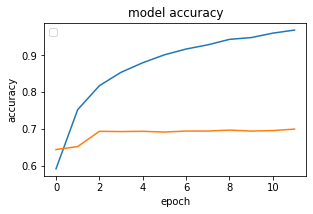

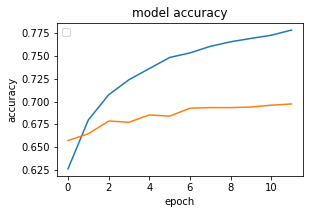

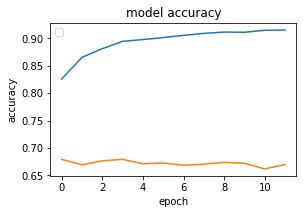

In [47]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

for dataset:  1
for dataset:  2
for dataset:  3


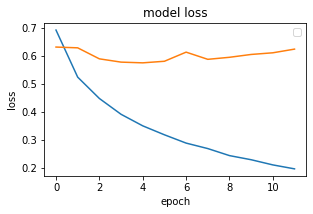

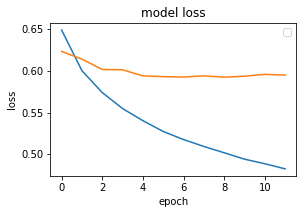

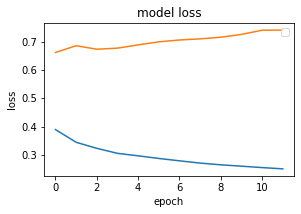

In [48]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with LSTM

In [49]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(LSTM(128))

In [50]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 5,913,477
Trainable params: 117,377
Non-trainable params: 5,796,100
_________________________________________________________________


In [52]:
hist = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    print()
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 20,
        verbose = 1,
        validation_split = 0.2
    )
    print()

for dataset:  1

Epoch 1/20
47/47 [==============================] - 8s 168ms/step - loss: 0.6486 - acc: 0.6127 - val_loss: 0.5755 - val_acc: 0.7060
Epoch 2/20
47/47 [==============================] - 8s 171ms/step - loss: 0.5232 - acc: 0.7405 - val_loss: 0.5204 - val_acc: 0.7460
Epoch 3/20
47/47 [==============================] - 9s 197ms/step - loss: 0.5318 - acc: 0.7365 - val_loss: 0.5087 - val_acc: 0.7653
Epoch 4/20
47/47 [==============================] - 7s 147ms/step - loss: 0.5001 - acc: 0.7660 - val_loss: 0.4650 - val_acc: 0.7893
Epoch 5/20
47/47 [==============================] - 7s 149ms/step - loss: 0.4509 - acc: 0.7942 - val_loss: 0.4552 - val_acc: 0.7860
Epoch 6/20
47/47 [==============================] - 7s 149ms/step - loss: 0.4815 - acc: 0.7733 - val_loss: 0.4823 - val_acc: 0.7647
Epoch 7/20
47/47 [==============================] - 8s 165ms/step - loss: 0.4320 - acc: 0.8032 - val_loss: 0.4543 - val_acc: 0.7927
Epoch 8/20
47/47 [==============================] - 7s 152m

In [53]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
235/235 [==============================] - 7s 29ms/step - loss: 0.3273 - acc: 0.8925
for dataset:  2
235/235 [==============================] - 7s 28ms/step - loss: 0.4323 - acc: 0.8556
for dataset:  3
235/235 [==============================] - 7s 28ms/step - loss: 0.2339 - acc: 0.9257

dataset 1: loss - 0.32734182476997375, acc - 0.8925333619117737

dataset 2: loss - 0.43225541710853577, acc - 0.8555999994277954

dataset 3: loss - 0.23391851782798767, acc - 0.9257333278656006


In [54]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
79/79 [==============================] - 2s 28ms/step - loss: 0.6502 - acc: 0.7956
for dataset:  2
79/79 [==============================] - 2s 28ms/step - loss: 0.9167 - acc: 0.7072
for dataset:  3
79/79 [==============================] - 2s 27ms/step - loss: 0.7741 - acc: 0.7508

dataset 1: loss - 0.6501577496528625, acc - 0.7955999970436096

dataset 2: loss - 0.9167023301124573, acc - 0.7071999907493591

dataset 3: loss - 0.7741087675094604, acc - 0.7508000135421753


for dataset:  1
for dataset:  2
for dataset:  3


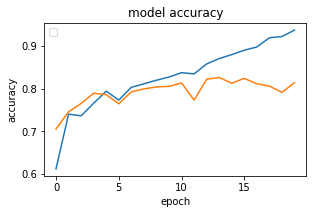

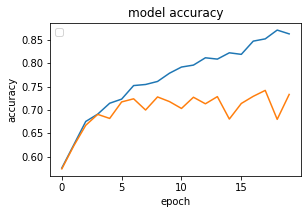

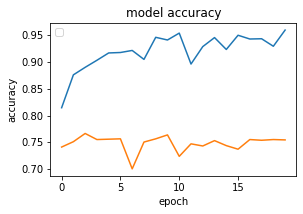

In [55]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

for dataset:  1
for dataset:  2
for dataset:  3


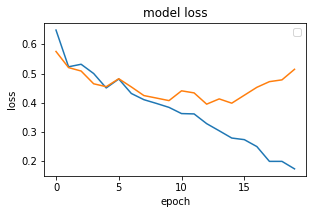

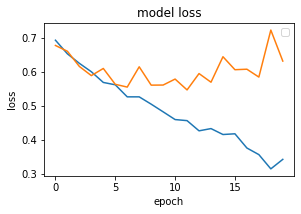

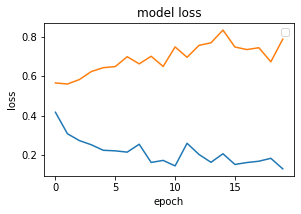

In [56]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with Bi-Directional LSTM

In [57]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model = Sequential()
embed_layer = Embedding(
    vocab_size,
    100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    Bidirectional(
        LSTM(
            100,
            return_sequences = True,
            dropout = 0.50
        ),
        merge_mode = 'concat'
    )
)
model.add(
    TimeDistributed(
        Dense(
            100,
            activation = 'sigmoid'
        )
    )
)
model.add(Flatten())

In [58]:
model.add(
    Dense(
        100,
        activation = 'sigmoid'
    )
)
model.add(
    Dense(
        3,
        activation = 'softmax'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          160800    
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 100)          20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1000100   
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 6,977,403
Trainable params: 1,181,303
Non-trainable params: 5,796,100
____________________________________

In [60]:
hist = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    print()
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 20,
        verbose = 1,
        validation_split = 0.2
    )
    print()

for dataset:  1

Epoch 1/20
47/47 [==============================] - 14s 308ms/step - loss: 1.3638 - acc: 0.2927 - val_loss: 1.0280 - val_acc: 0.4960
Epoch 2/20
47/47 [==============================] - 12s 263ms/step - loss: 0.8116 - acc: 0.3117 - val_loss: 0.7575 - val_acc: 0.5040
Epoch 3/20
47/47 [==============================] - 11s 241ms/step - loss: 0.7515 - acc: 0.3937 - val_loss: 0.7548 - val_acc: 0.0000e+00
Epoch 4/20
47/47 [==============================] - 11s 244ms/step - loss: 0.7511 - acc: 0.4137 - val_loss: 0.7548 - val_acc: 0.0000e+00
Epoch 5/20
47/47 [==============================] - 14s 290ms/step - loss: 0.7511 - acc: 0.3045 - val_loss: 0.7548 - val_acc: 0.0047
Epoch 6/20
47/47 [==============================] - 12s 263ms/step - loss: 0.7511 - acc: 0.2918 - val_loss: 0.7548 - val_acc: 0.0527
Epoch 7/20
47/47 [==============================] - 12s 250ms/step - loss: 0.7511 - acc: 0.3948 - val_loss: 0.7548 - val_acc: 0.4867
Epoch 8/20
47/47 [==========================

In [61]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
235/235 [==============================] - 7s 28ms/step - loss: 0.7519 - acc: 0.4920
for dataset:  2
235/235 [==============================] - 7s 28ms/step - loss: 0.6983 - acc: 0.5775
for dataset:  3
235/235 [==============================] - 7s 28ms/step - loss: 0.7691 - acc: 0.4637

dataset 1: loss - 0.7518537640571594, acc - 0.492000013589859

dataset 2: loss - 0.6983428597450256, acc - 0.5774666666984558

dataset 3: loss - 0.7691359519958496, acc - 0.46373334527015686


In [62]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
79/79 [==============================] - 2s 28ms/step - loss: 0.7604 - acc: 0.4948
for dataset:  2
79/79 [==============================] - 2s 28ms/step - loss: 0.6880 - acc: 0.5920
for dataset:  3
79/79 [==============================] - 2s 28ms/step - loss: 0.7592 - acc: 0.4732

dataset 1: loss - 0.760356068611145, acc - 0.49480000138282776

dataset 2: loss - 0.6879917979240417, acc - 0.5920000076293945

dataset 3: loss - 0.7592472434043884, acc - 0.4731999933719635


for dataset:  1
for dataset:  2
for dataset:  3


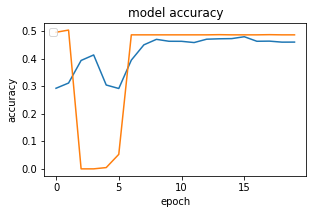

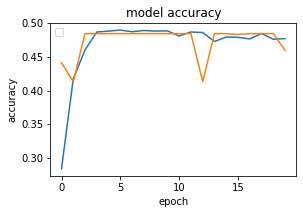

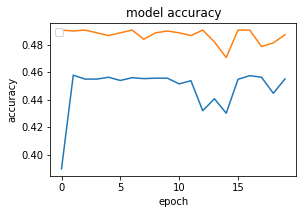

In [63]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

for dataset:  1
for dataset:  2
for dataset:  3


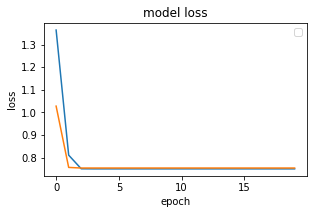

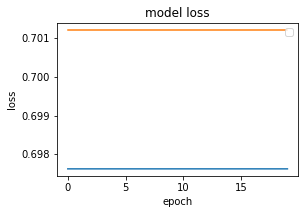

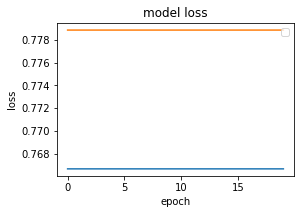

In [64]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with GRU

In [65]:
from keras.layers.recurrent import GRU

In [66]:
model = Sequential()
embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)
model.add(
    GRU(256)
)

In [67]:
model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
gru (GRU)                    (None, 256)               274944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 6,071,301
Trainable params: 275,201
Non-trainable params: 5,796,100
_________________________________________________________________


In [69]:
hist = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    print()
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 20,
        verbose = 1,
        validation_split = 0.2
    )
    print()

for dataset:  1

Epoch 1/20
47/47 [==============================] - 15s 321ms/step - loss: 0.6619 - acc: 0.5942 - val_loss: 0.6061 - val_acc: 0.6753
Epoch 2/20
47/47 [==============================] - 15s 318ms/step - loss: 0.5908 - acc: 0.6858 - val_loss: 0.5623 - val_acc: 0.7127
Epoch 3/20
47/47 [==============================] - 15s 321ms/step - loss: 0.4890 - acc: 0.7695 - val_loss: 0.4466 - val_acc: 0.7940
Epoch 4/20
47/47 [==============================] - 15s 318ms/step - loss: 0.4431 - acc: 0.7918 - val_loss: 0.4364 - val_acc: 0.7940
Epoch 5/20
47/47 [==============================] - 15s 328ms/step - loss: 0.3971 - acc: 0.8213 - val_loss: 0.3882 - val_acc: 0.8287
Epoch 6/20
47/47 [==============================] - 15s 317ms/step - loss: 0.3693 - acc: 0.8320 - val_loss: 0.4311 - val_acc: 0.7873
Epoch 7/20
47/47 [==============================] - 17s 353ms/step - loss: 0.3619 - acc: 0.8392 - val_loss: 0.3806 - val_acc: 0.8300
Epoch 8/20
47/47 [==============================] - 

In [70]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
235/235 [==============================] - 12s 49ms/step - loss: 0.3214 - acc: 0.9177
for dataset:  2
235/235 [==============================] - 12s 50ms/step - loss: 0.7447 - acc: 0.7976
for dataset:  3
235/235 [==============================] - 12s 50ms/step - loss: 0.2325 - acc: 0.9417

dataset 1: loss - 0.32139694690704346, acc - 0.9177333116531372

dataset 2: loss - 0.7447487711906433, acc - 0.7975999712944031

dataset 3: loss - 0.23251526057720184, acc - 0.9417333602905273


In [71]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
79/79 [==============================] - 4s 50ms/step - loss: 0.9535 - acc: 0.7904
for dataset:  2
79/79 [==============================] - 4s 50ms/step - loss: 1.1925 - acc: 0.6824
for dataset:  3
79/79 [==============================] - 4s 49ms/step - loss: 1.0330 - acc: 0.7432

dataset 1: loss - 0.9535172581672668, acc - 0.7904000282287598

dataset 2: loss - 1.1924952268600464, acc - 0.6823999881744385

dataset 3: loss - 1.0330021381378174, acc - 0.7432000041007996


for dataset:  1
for dataset:  2
for dataset:  3


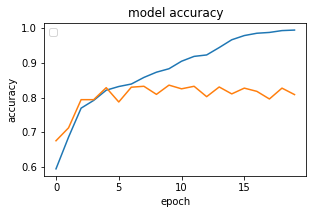

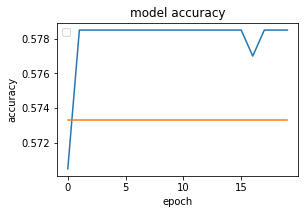

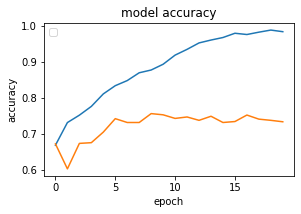

In [72]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['acc'])
    plt.plot(hist[i].history['val_acc'])
    plt.tight_layout(pad=1.0)

plt.show()

for dataset:  1
for dataset:  2
for dataset:  3


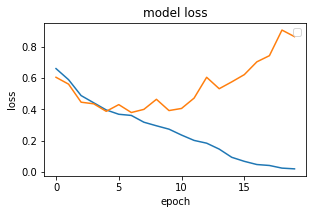

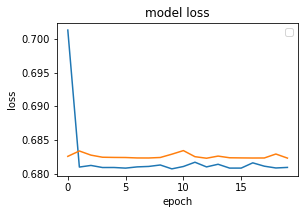

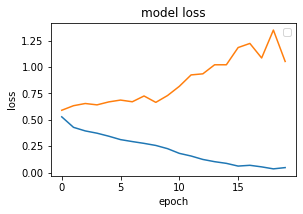

In [73]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

## Text Classification with CNN

In [74]:
model = Sequential()

embed_layer = Embedding(
    vocab_size, 100,
    weights = [embed_matrix],
    input_length = maxlen,
    trainable = False
)
model.add(embed_layer)

model.add(
    Conv1D(128, 5,
        activation = 'relu'
    )
)
model.add(GlobalMaxPooling1D())
model.add(
    Dense(1,
          activation = 'sigmoid'
    )
)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          5796100   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 5,860,357
Trainable params: 64,257
Non-trainable params: 5,796,100
_________________________________________________________________


In [75]:
model.save('model.m5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model.m5/assets


In [76]:
hist = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    print()
    hist[i] = model.fit(
        X_train[i], y_train[i],
        batch_size = 128,
        epochs = 20,
        verbose = 1,
        validation_split = 0.2
    )
    print()

for dataset:  1

Epoch 1/20
47/47 [==============================] - 2s 51ms/step - loss: 0.6603 - accuracy: 0.6215 - val_loss: 0.5792 - val_accuracy: 0.7067
Epoch 2/20
47/47 [==============================] - 2s 48ms/step - loss: 0.5103 - accuracy: 0.7743 - val_loss: 0.4950 - val_accuracy: 0.7900
Epoch 3/20
47/47 [==============================] - 2s 48ms/step - loss: 0.4235 - accuracy: 0.8385 - val_loss: 0.4460 - val_accuracy: 0.8047
Epoch 4/20
47/47 [==============================] - 2s 49ms/step - loss: 0.3604 - accuracy: 0.8702 - val_loss: 0.4187 - val_accuracy: 0.8233
Epoch 5/20
47/47 [==============================] - 2s 49ms/step - loss: 0.3141 - accuracy: 0.8940 - val_loss: 0.4151 - val_accuracy: 0.8100
Epoch 6/20
47/47 [==============================] - 2s 50ms/step - loss: 0.2758 - accuracy: 0.9105 - val_loss: 0.3936 - val_accuracy: 0.8280
Epoch 7/20
47/47 [==============================] - 2s 49ms/step - loss: 0.2416 - accuracy: 0.9297 - val_loss: 0.4140 - val_accuracy: 0.8

47/47 [==============================] - 2s 47ms/step - loss: 0.0106 - accuracy: 0.9992 - val_loss: 0.7234 - val_accuracy: 0.7587
Epoch 19/20
47/47 [==============================] - 2s 45ms/step - loss: 0.0102 - accuracy: 0.9992 - val_loss: 0.7303 - val_accuracy: 0.7560
Epoch 20/20
47/47 [==============================] - 2s 44ms/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 0.7347 - val_accuracy: 0.7573



In [77]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_train[i], y_train[i],
        verbose = 1
    )

for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
235/235 [==============================] - 1s 5ms/step - loss: 0.1785 - accuracy: 0.9321
for dataset:  2
235/235 [==============================] - 1s 5ms/step - loss: 0.2142 - accuracy: 0.9333
for dataset:  3
235/235 [==============================] - 1s 6ms/step - loss: 0.1543 - accuracy: 0.9508

dataset 1: loss - 0.17847700417041779, acc - 0.9321333169937134

dataset 2: loss - 0.2141987830400467, acc - 0.9333333373069763

dataset 3: loss - 0.15431120991706848, acc - 0.9508000016212463


In [78]:
loss = [[]] * 3
acc = [[]] * 3

for i in range(3):
    print('for dataset: ', i+1)
    loss[i], acc[i] = model.evaluate(
        X_test[i], y_test[i],
        verbose = 1
    )
    
for i in range(3):
    print('\ndataset {}: loss - {}, acc - {}'.format(i+1, loss[i], acc[i]))

for dataset:  1
79/79 [==============================] - 0s 6ms/step - loss: 0.6188 - accuracy: 0.7824
for dataset:  2
79/79 [==============================] - 0s 5ms/step - loss: 0.8769 - accuracy: 0.7068
for dataset:  3
79/79 [==============================] - 0s 6ms/step - loss: 0.7546 - accuracy: 0.7388

dataset 1: loss - 0.6187899112701416, acc - 0.7824000120162964

dataset 2: loss - 0.8768772482872009, acc - 0.7067999839782715

dataset 3: loss - 0.7546061277389526, acc - 0.7387999892234802


for dataset:  1
for dataset:  2
for dataset:  3


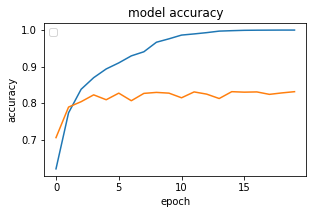

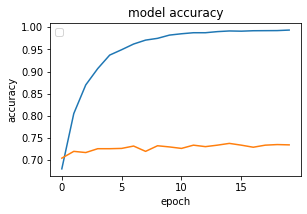

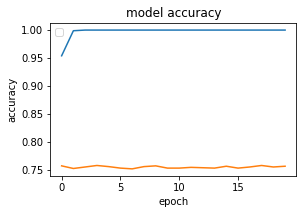

In [79]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.plot(hist[i].history['accuracy'])
    plt.plot(hist[i].history['val_accuracy'])
    plt.tight_layout(pad=1.0)

plt.show()

for dataset:  1
for dataset:  2
for dataset:  3


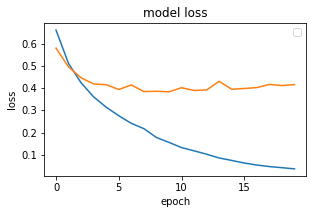

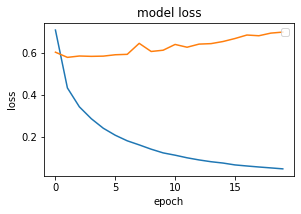

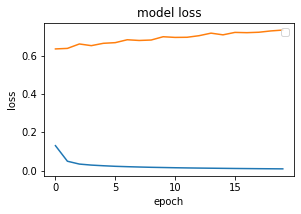

In [80]:
for i in range(3):
    print('for dataset: ', i+1)
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, i+1)
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.tight_layout(pad=1.0)

plt.show()

In [81]:
def predictions(text):
  text1 = tokenizer.texts_to_sequences(text)
  text2 = pad_sequences(
        text1,
        padding = 'post',
        maxlen = maxlen
    )
  pred = model.predict(text2)
  return 'positive' if pred[0] >= 0.5 else 'negative'

In [82]:
predictions(["Wade.Grad.Hot.Bald. Your not gonna shave your head! Uh. Yeah.I hot.get babes Hahahaha man love Wade!"])

'positive'

In [83]:
predictions(["waaaaahhh. ohyeah i had something to do eeee. haha"])

'negative'

In [84]:
predictions(["This is very bad. You should not do this."])

'negative'

In [85]:
predictions(["I am very happy to hear that."])

'positive'

In [86]:
predictions(["Wow! You look so beautiful."])

'positive'